In [7]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [8]:
# Définir les chemins des données
data_dir = r"D:\dataset_new\train2"
batch_size = 32
img_height, img_width = 128, 128  # Dimensions des images


In [9]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,          # Normalisation des pixels
    rotation_range=20,            # Rotation aléatoire des images
    width_shift_range=0.2,        # Décalage horizontal
    height_shift_range=0.2,       # Décalage vertical
    shear_range=0.2,              # Transformation en cisaillement
    zoom_range=0.2,               # Zoom aléatoire
    horizontal_flip=True,         # Flip horizontal
    validation_split=0.3,         # 30% des données pour validation
)


In [10]:
# Charger les données d'entraînement et de validation
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',           # Sous-ensemble d'entraînement
)

Found 2033 images belonging to 4 classes.


In [11]:
val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',         # Sous-ensemble de validation
)


Found 867 images belonging to 4 classes.


In [12]:
# Construire le modèle CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])


C:\Users\SOUHA\.anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compiler le modèle
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,052 (12.61 MB)

 Trainable params: 3,305,604 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
# Callbacks pour améliorer l'entraînement
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

In [16]:
# Entraîner le modèle
epochs = 50
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
  
)


Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 46s 715ms/step - accuracy: 0.6346 - loss: 0.6997 - val_accuracy: 0.2757 - val_loss: 24.4574
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 43s 673ms/step - accuracy: 0.6430 - loss: 0.6485 - val_accuracy: 0.3345 - val_loss: 5.7240
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 44s 691ms/step - accuracy: 0.6943 - loss: 0.5894 - val_accuracy: 0.4994 - val_loss: 2.5141
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 641ms/step - accuracy: 0.6694 - loss: 0.5949 - val_accuracy: 0.5525 - val_loss: 1.9643
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 640ms/step - accuracy: 0.6919 - loss: 0.5778 - val_accuracy: 0.5386 - val_loss: 1.3893
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 641ms/step - accuracy: 0.6504 - loss: 0.6255 - val_accuracy: 0.6690 - val_loss: 0.7138
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 643ms/step - accuracy: 0.6765 - loss: 0.5758 - val_accuracy: 0.6448 - val_loss: 0.5683
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 43s 680ms/step - accuracy: 0.7072 - loss: 0.5873 - val_acc

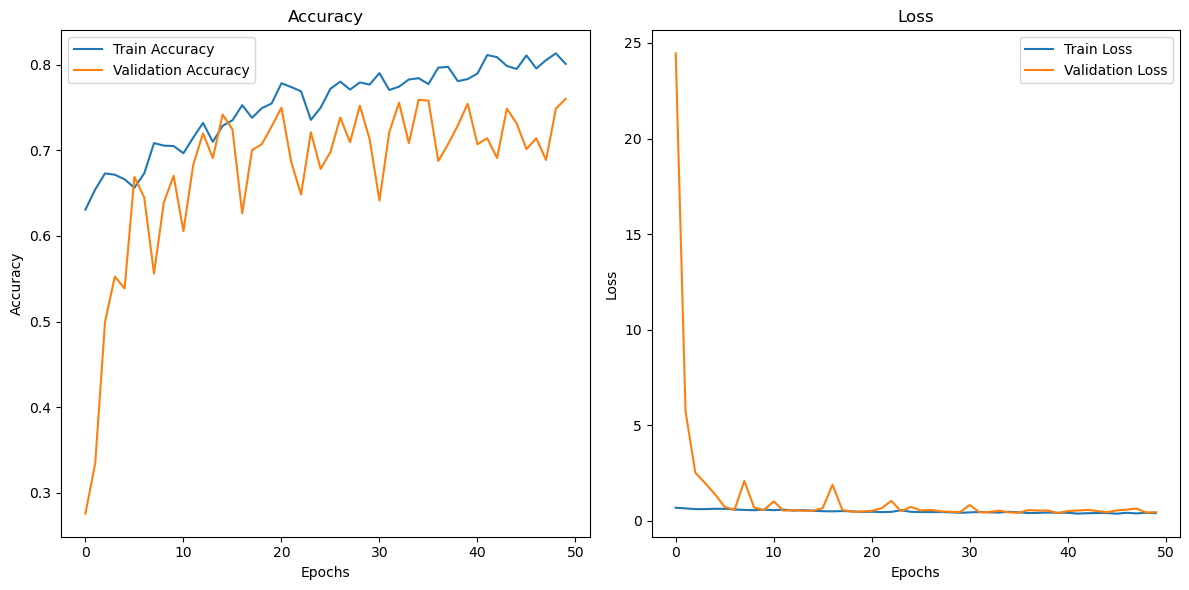

In [17]:
# Visualiser les performances
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
# Évaluer le modèle
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 783ms/step - accuracy: 0.7609 - loss: 0.4502
Validation Accuracy: 76.47%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Text(0.5, 1.0, 'Matrice de Confusion')

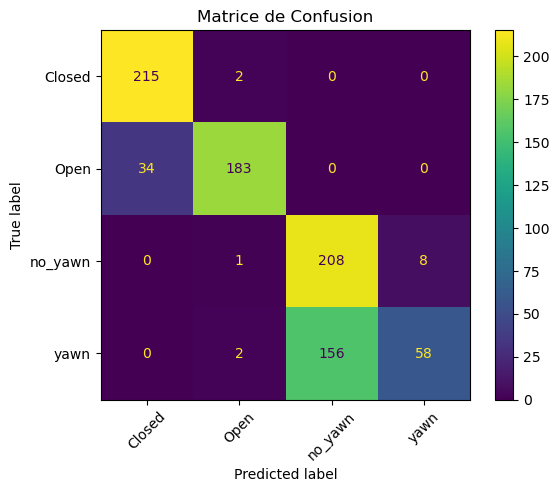

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Étape 1 : Obtenir les prédictions et les vraies classes
y_true = []  # Les vraies classes
y_pred = []  # Les prédictions du modèle

# Parcourir les données de validation
for images, labels in val_data:
    predictions = model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))  # Vraies classes
    y_pred.extend(np.argmax(predictions, axis=1))  # Classes prédites
    
    # Arrêter après avoir parcouru l'ensemble du dataset
    if len(y_true) >= val_data.samples:
        break

# Étape 2 : Calculer la matrice de confusion
class_names = list(train_data.class_indices.keys())  # Obtenir les noms des classes
conf_matrix = confusion_matrix(y_true, y_pred)

# Étape 3 : Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation=45)
plt.title("Matrice de Confusion")

Matrice de confusion brute :
[[3 0 0 0]
 [0 3 0 0]
 [0 1 2 0]
 [0 0 0 2]]


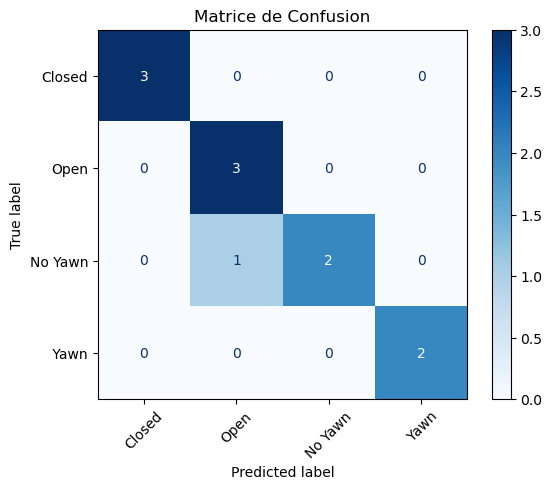

In [62]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Exemple de données factices (remplacez par vos vrais y_actual et y_pred_labels)
y_actual = [0, 1, 2, 2, 0, 1, 3, 3, 1, 0, 2]  # Vraies classes
y_pred_labels = [0, 1, 2, 1, 0, 1, 3, 3, 1, 0, 2]  # Prédictions du modèle

# Génération de la matrice de confusion
conf_matrix = confusion_matrix(y_actual, y_pred_labels)

# Affichage de la matrice de confusion brute
print("Matrice de confusion brute :")
print(conf_matrix)

# Ajout des noms de classes
class_names = ["Closed", "Open", "No Yawn", " Yawn"]

# Affichage graphique de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Matrice de Confusion")
plt.show()


In [23]:
# Sauvegarder le modèle
model.save("eye_yawn_model.h5")

# Enregistrer le modèle en format .keras
model.save('eye_yawn_model.keras')

In [28]:
# Pour charger le modèle plus tard
from tensorflow.keras.models import load_model
modele_charge = load_model('eye_yawn_model.keras')



C:\Users\SOUHA\.anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [29]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_image(image_path, model):
    image = load_img(image_path, target_size=(img_height, img_width))
    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)  # Ajouter une dimension pour le batch
    predictions = model.predict(image_array)
    class_indices = {v: k for k, v in train_data.class_indices.items()}  # Inverser les indices des classes
    predicted_class = class_indices[np.argmax(predictions)]
    return predicted_class

# Exemple
new_image = r"D:\archive\data\train\close eyes\2.png"
print("Predicted class:", predict_image(new_image, model))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Predicted class: Closed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


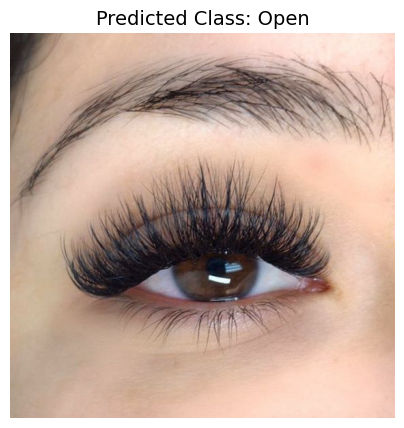

Predicted class: Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


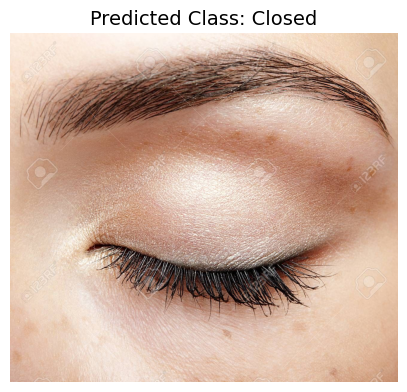

Predicted class: Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


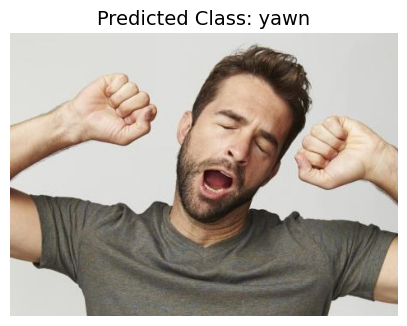

Predicted class: yawn


In [61]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

def predict_and_display_image(image_path, model):
    # Charger l'image et la convertir en tableau
    image = load_img(image_path, target_size=(img_height, img_width))
    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)  # Ajouter une dimension pour le batch
    
    # Faire une prédiction
    predictions = model.predict(image_array)
    class_indices = {v: k for k, v in train_data.class_indices.items()}  # Inverser les indices des classes
    predicted_class = class_indices[np.argmax(predictions)]
    
    # Afficher l'image
    plt.figure(figsize=(5, 5))
    plt.imshow(load_img(image_path))  # Charger l'image dans sa taille d'origine
    plt.title(f"Predicted Class: {predicted_class}", fontsize=14)
    plt.axis('off')
    plt.show()
    
    return predicted_class

# Exemple
new_image = r"D:\dataset_new\image.jpg"
predicted_class = predict_and_display_image(new_image, model)
print("Predicted class:", predicted_class)
new_image = r"D:\dataset_new\image3.jpg"
predicted_class = predict_and_display_image(new_image, model)
print("Predicted class:", predicted_class)


new_image = r"D:\dataset_new\image7.jpg"
predicted_class = predict_and_display_image(new_image, model)
print("Predicted class:", predicted_class)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


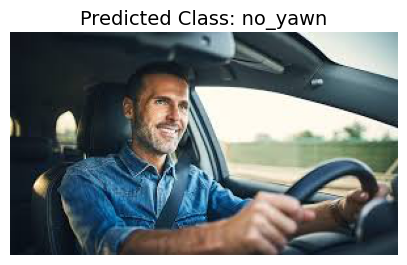

Predicted class: no_yawn


In [49]:
new_image = r"D:\dataset_new\image22.jpg"
predicted_class = predict_and_display_image(new_image, model)
print("Predicted class:", predicted_class)

